**Zrýchlenie - zoznámenie sa so senzorom**

Cieľom tohto cvičenia je pochopiť, ako senzor SciLabs meria zrýchlenie a takisto, kedy na objekt v pohybe zrýchlenie pôsobí. Najprv vsak krátky teoretický úvod.

Prvý Newtonov pohybový zákon hovorí, ze teleso zotrváva v pokoji, alebo rovnomernom priamočiarom pohybe, ak naňho nepôsobí žiadna sila, alebo ak výslednica síl je nulová.

Príklady:
- objekty na medzinárodnej vesmírnej stanici, pretože výslednica gravitačného zrýchlenia a odstredivého zrýchlenia (pozor, odstredivá sila nie je skutočná a bude vysvetlená v rámci vzťažných sústav!) sú nulové, čo vytvára zdanlivý dojem, že na objekty nepôsobí žiadna sila.
https://www.youtube.com/watch?v=W1lkeM6YoqU&ab_channel=CanadianSpaceAgency
- senzor SciLabs, položený na stole. Na senzor pôsobí gravitačné zrýchlenie smerom nadol, ale takisto rovnakým zrýchlením naň pôsobí samotný stôl. Výslednica je teda opäť na nulová a senzor sa nehýbe.




In [ ]:
# nacitanie kniznic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_excel(r"/content/hody_acc.xlsx") # nacitanie excelovskych dat
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
acc_x = np.array(df.iloc[:, 1][0:-1] )
acc_y = np.array(df.iloc[:, 2][0:-1] )
acc_z = np.array(df.iloc[:, 3][0:-1] )
acc = np.sqrt(acc_x**2+acc_y**2+acc_z**2) # tento riadok nechat nevyplneny

Senzor meria zrýchlenie v jednotkách gravitačného zrýchlenia Zeme.Meria tri zložky x, y, z a celková veľkosť sa dá spočítať ako  $|\vec{a}|=\sqrt{a_x^2+a_y^2+a_z^2}=$. Škálovanie senzora je nasledujúce:
- v prípade, že senzor voľne položíme na nehybný povrch, senzor nameria $|\vec{a}|=1~\rm{G}$, čo znamená, že na senzor pôsobí stôl silou úmernou gravitačnému zrýchleniu Zeme (1G), ktorá ho kompenzuje.
- ak senzor pustíme voľne padať na zem, výslednica nameraného zrýchlenia $|\vec{a}|=0~\rm{G}$ čo znamená, že na senzor okrem gravitačného zrýchlenia Zeme nepôsobí žiadna iná sila. Táto hodnota odpovedá stavu beztiaže a rovnomerne zrýchlenému pohybu.
- ak senzor vyhodíme do výšky, pôsobíme na senzor väčším zrýchlením ako Zem, čiže nameraná hodnota je $|\vec{a}|>1~\rm{G}$

Úloha č. 1 - otvorte aplikáciu SciLabs, vykresľujte veľkosť zrýchlenia nameranú počas rôznych situácií. Skúste ho položiť na stôl, vyhodiť do výšky, chytiť (kvôli životnosti senzoru je  táto možnosť v prípade vyhodenia odporúčaná), voľne pustiť na zem, prebehnite sa s ním po miestnosti. Pokúste sa pochopiť, či namerané hodnoty odpovedajú popisu o pár riadkov vyššie.

Úloha č. 2

Ak ste si pre hodnoty namerané senzorom vytvorili dostatočnú intuíciu, vykonajte nasledujúce meranie. Po začatí nahrávania merania držte senzor približne 2 sekundy nehybne v ruke, následne ho do výšky približne 20 cm vyhoďte a chyťte. Počkajte ďalšie 2 sekundy a vyhoďte senzor znova. Počkajte ďalšie 2 sekundy a vyhoďte senzor aj tretí krát. Následne nahrávanie ukončite.

Bez toho, aby ste vykresľovali namerané dáta, pokúste sa načrtnúť ako bude vyzerať nameraná krivka. Nakreslite teda graf závislosti veľkosti vektora $|\vec{a}|$ na čase $t$. Vyznačte do grafu nasledujúce udalosti: senzor je v pokoji na ruke, senzor bol vyhodený hore, senzor letí smerom hore, senzor letí smerom nadol a senzor bol chytený.

Text(0, 0.5, '$a [g]$')

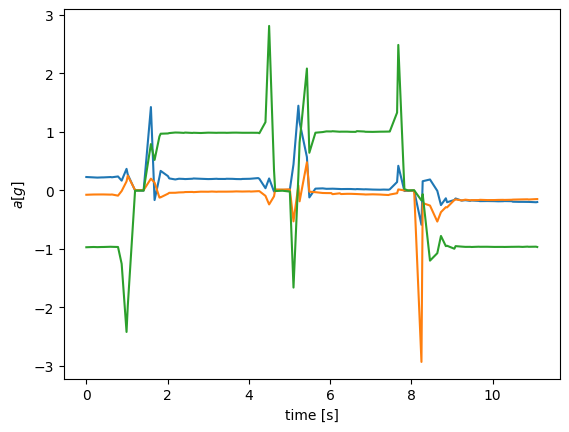

In [ ]:
# vykreslenie nameranych dat

plt.plot(time,acc_x)
plt.plot(time,acc_y)
plt.plot(time,acc_z)
plt.xlabel('time [s]')
plt.ylabel('$a [g]$')

Na grafe vidno, že to, ktorá zložka ako vyzerá ako závisí od natočenia senzoru. Kvôli tomu na interaktívnom grafe vykreslite iba veľkosť vektora zrýchlenia a porovnajte s vašou predpoveďou. Diskutujte.



In [ ]:
import plotly.graph_objects as go
import numpy as np

np.random.seed(42)
random_data = np.random.randn(100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = time,
    y = acc, # vyberte príslušnú zložku zrýchlenia (a_x, a_y, a_z)
    mode='lines+markers',
    name='Dostredivé zrýchlenie'
))

fig.update_traces(
    hoverinfo='x+y',
    hovertemplate='X: %{x}<br>Y: %{y}<extra></extra>',
    marker=dict(size=5),
    line=dict(width=1)
)

fig.update_layout(
    hovermode='y unified',
    xaxis=dict(showspikes=True),
    yaxis=dict(showspikes=True),
)

fig.show()